[31.3919607704699, array([  0.        , -12.26309659]), 0.36996908334337664] 
[-20.69664904264814, array([  0.        , -12.65448396,   6.137938  ]), 0.7893819760519506] 
[-21.555776083652482, array([ 0.        , -1.35979335,  6.23056707, -0.73894641]), 0.8835086181081262] 
[5.500000000000078, array([ 0. , -0.6, -4.6, -0.8,  0.5]), 1.0]


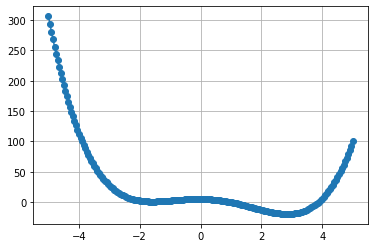

In [2]:
#Fit a nonlinear  equation using polynomain regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

#Make indep and dep variables
X = np.linspace(-5, 5, 200)
Y = np.array(5.5 - (0.6*(X)) - (4.6*(X**2)) - (0.8*(X**3)) + (0.5*(X**4)))

#plot graph
plt.plot(X, Y, marker='o')
plt.grid()

#Split Training and Testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)


#Train the models
def getPolyCoeffs(degree):
  linearModel = LinearRegression()

  polyModel = PolynomialFeatures(degree)
  xPolyFit = polyModel.fit_transform(X_train.reshape(-1, 1))
  xTest_PolyFit = polyModel.fit_transform(X_test.reshape(-1, 1))

  linearModel.fit(xPolyFit, Y_train)

  return [linearModel.intercept_, linearModel.coef_, linearModel.score(xTest_PolyFit, Y_test)] #b0, b1, r2


firstDegree = getPolyCoeffs(1)
secondDegree = getPolyCoeffs(2)
thirdDegree = getPolyCoeffs(3)
fourthDegree = getPolyCoeffs(4)
print("{} \n{} \n{} \n{}".format(firstDegree, secondDegree, thirdDegree, fourthDegree))